In [2]:
import matplotlib.pyplot as plt   # To plot a graph
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc

In [371]:

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier



In [6]:
Height =[70,60,50,55,65 ,56, 56]
Weight =[65,58,55,65,57, 67, 50]
data={"Height":Height,"Weight":Weight}
df=pd.DataFrame(data)
df


df=pd.DataFrame(Height,columns=["Height"])
df["Weight"]=Weight
df


,Height,Weight
0,70,65
1,60,58
2,50,55
3,55,65
4,65,57
5,56,67
6,56,50


In [19]:

mean_Height = df.Height.mean()
mean_Weight = df.Weight.mean()

print(f'Average height : {mean_Height:5.2f}, Average weight : {mean_Weight:5.2f}')



Average height : 58.86, Average weight : 59.57


Average height : 58.86, Average weight : 59.57


C:\Users\ravik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ravik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ravik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


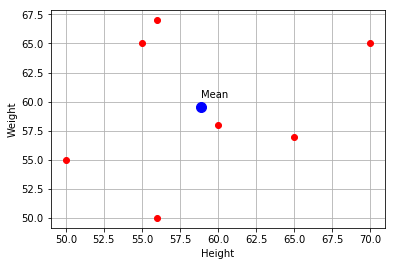

In [20]:
print(f'Average height : {mean_Height:5.2f}, Average weight : {mean_Weight:5.2f}')

# Visual represenatation of the sample data
#-------------------------------------------------------
plt.plot(df.Height, df.Weight, "ro")
plt.plot(mean_Height, mean_Weight, "bo", markersize=10)# Mean
plt.text(mean_Height, mean_Weight+.8, "Mean")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()



In [34]:
model=LinearRegression()

In [35]:
x=df.Height
y=df.Weight
y

0    65
1    58
2    55
3    65
4    57
5    67
6    50
Name: Weight, dtype: int64

In [36]:
x=pd.DataFrame(x)

In [37]:

y=model.fit(x,y)
y

LinearRegression()

In [38]:
print(model.intercept_,model.coef_)

44.78010471204188 [0.2513089]


In [39]:
c=model.intercept_
m=model.coef_
ypredict=model.predict(x)
df["Predict"]=pd.DataFrame({"predict":ypredict})
df


,Height,Weight,Predict,residual
0,70,65,62.371728,2.628272
1,60,58,59.858639,-1.858639
2,50,55,57.345550,-2.345550
3,55,65,58.602094,6.397906
4,65,57,61.115183,-4.115183
5,56,67,58.853403,8.146597
6,56,50,58.853403,-8.853403


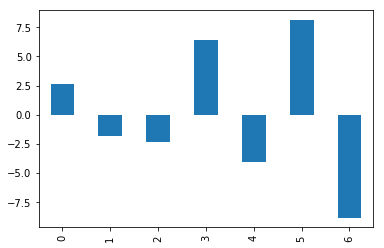

In [40]:
df["residual"]=df["Weight"]-df["Predict"]
df.mean()
dfres_error=df.residual
df.residual.plot(kind='bar')

In [41]:

x=[0,70]
y=c+m*x
y
xax=np.arange(0,70,10)
yax=[xax,y[0]]
len(y)

2

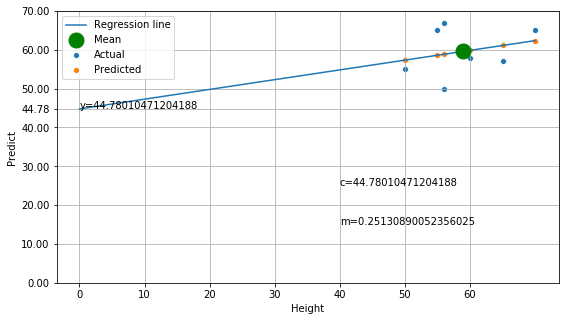

In [42]:
plt.figure(figsize=(9,5))
sns.scatterplot(x="Height",y="Weight",data=df,label="Actual")
sns.scatterplot(x="Height",y="Predict",data=df,label="Predicted")
plt.plot(x,y,label="Regression line")
plt.plot(mean_Height,mean_Weight,"go",markersize=15,label="Mean")
plt.xticks(xax)
plt.yticks([0,10,20,30,40,44.78,50,60,70])
plt.text(0,44.78,'y='+str(y[0]))
plt.text(40,25,'c='+str(c))
plt.text(40,15,'m='+str(m[0]))
plt.legend()
plt.grid()
plt.show()

2

# stock prediction

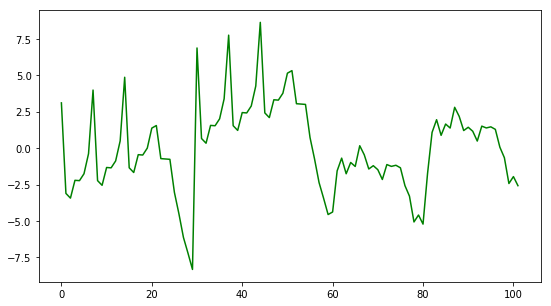

In [27]:
from sklearn.preprocessing import scale
plt.figure(figsize=(9,5))

y=[893.60,887.25,886.80,887.90,887.75,888.1,889.35,893.60,887.25,
   886.80,887.90,887.75,888.1,889.35,893.60,887.25,886.80,887.90,887.75,888.1,889.35,889.4,887,886.85,886.7,884.3,882.70,880.95,879.75,878.5,893.60,887.25,886.80,887.90,887.75,888.1,889.35,893.60,887.25,886.80,887.90,887.75,888.1,889.35,893.60,887.25,886.80,887.90,887.75,888.1,889.35,889.4,887,886.85,886.7,884.3,882.70,880.95,879.75,878.5,878.55,881.25,882,880.8,881.45,881.05,882.35,881.6,880.50,880.60,880.2,879.4,880.30,880.05,880.0,879.7,878.35,877.5,875.6,875.95,875.2,878.55,881.25,882,880.8,881.45,881.05,882.35,881.6,880.50,880.60,880.2,879.4,880.30,880.05,880.0,879.7,878.35,877.5,875.6,875.95,875.2]
x=np.arange(0,len(y))
y=np.array(y)
x,y
df=pd.DataFrame({"Time":x,"Price":y})
df
x=df[["Time"]]
y=df[["Price"]]

model=LinearRegression()
model.fit(x,y)
yPred=model.predict(x)
df["Predicted"]=yPred
df["error"]=df["Price"]-df["Predicted"]
df.head()
plt.plot(df["error"],'g',label="Price")

No handles with labels found to put in legend.


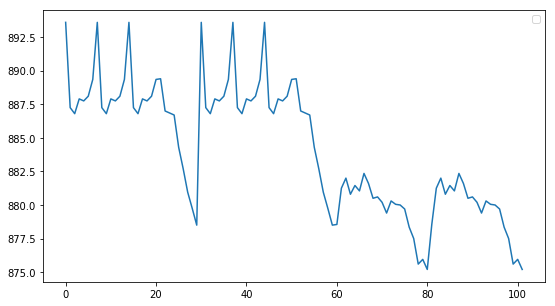

In [28]:
plt.figure(figsize=(9,5))

plt.plot(y)
plt.legend()
#plt.xticks([100,200,300,400,500,600,700,800,820,850,880,890,900,920])

[[-0.12582117]] [890.48730249]


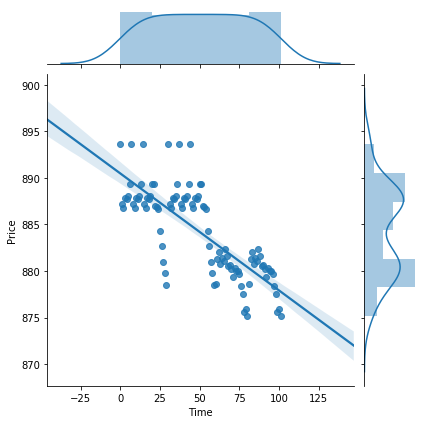

In [29]:
c=model.intercept_
m=model.coef_
print(m,c)
sns.jointplot(x=df["Time"],y=df["Price"],data=df,kind="reg")

In [30]:

#every 5 min data and neat 1 hrs. predict value
x=[len(x)+1,2,3,4,5,6,7,8,9,10,11,12]
y=m*x+c
y
print(y)
list(y)
y.min()

[[877.52772183 890.23566015 890.10983898 889.98401781 889.85819664
  889.73237546 889.60655429 889.48073312 889.35491195 889.22909078
  889.10326961 888.97744844]]


877.5277218298645

In [31]:
data=[{"y":y[0][i]}]

NameError: name 'i' is not defined

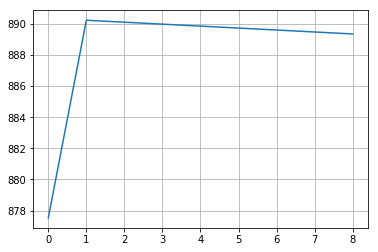

In [32]:
l=[]
for i in range(9):
    data=[{"y":y[0][i]}]
    d=pd.DataFrame(data)
    l.append(y[0][i])
#plt.figure(figsize=(9,5))
plt.plot(l)
plt.grid()

In [33]:
d.min()

y    889.354912
dtype: float64

In [30]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [4]:
df=pd.read_csv(r'C:\Users\ravik\Downloads\archivecarrs\mtcars.csv')

In [5]:

df.head()
df.shape

(32, 12)

In [6]:
df.size

384

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

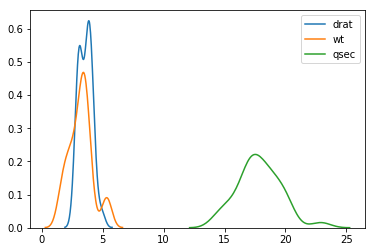

In [9]:
sns.distplot(df[["drat"]],hist=0,label="drat")
sns.distplot(df[["wt"]],hist=0,label="wt")
sns.distplot(df[["qsec"]],hist=0,label="qsec")

In [10]:
var=set(df)
var=list(var)
#for i in range(len(var)):
 #   print(var[i] ,set(df[var[i]]))

In [11]:
set(df["carb"]),set(df["gear"]),set(df["am"]),set(df["vs"]),set(df["cyl"])

({1, 2, 3, 4, 6, 8}, {3, 4, 5}, {0, 1}, {0, 1}, {4, 6, 8})

(array([3., 3., 3., 3., 9., 7., 1., 0., 0., 3.]),
 array([1.513 , 1.9041, 2.2952, 2.6863, 3.0774, 3.4685, 3.8596, 4.2507,
        4.6418, 5.0329, 5.424 ]),
 <a list of 10 Patch objects>)

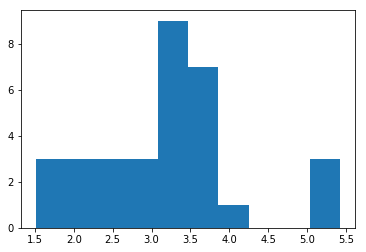

In [12]:
plt.hist(df.wt)

(array([15.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  5.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

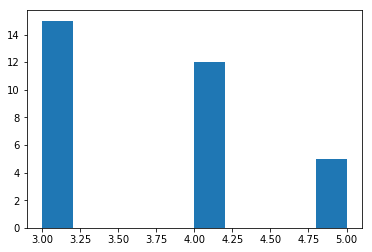

In [13]:
plt.hist(df.gear)

(array([2., 3., 4., 8., 6., 4., 4., 0., 0., 1.]),
 array([14.5 , 15.34, 16.18, 17.02, 17.86, 18.7 , 19.54, 20.38, 21.22,
        22.06, 22.9 ]),
 <a list of 10 Patch objects>)

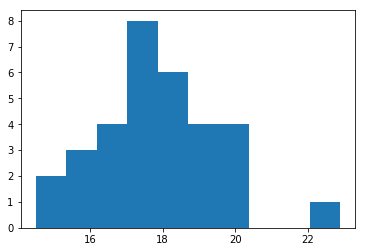

In [14]:
plt.hist(df.qsec)

(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

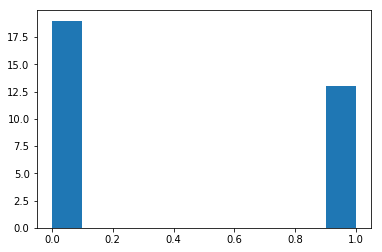

In [15]:
plt.hist(df.am)

(array([11.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0., 14.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <a list of 10 Patch objects>)

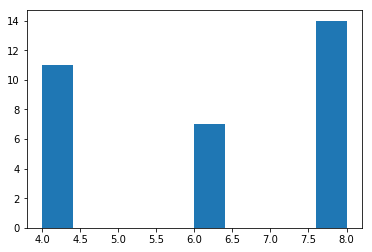

In [16]:
plt.hist(df.cyl)

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

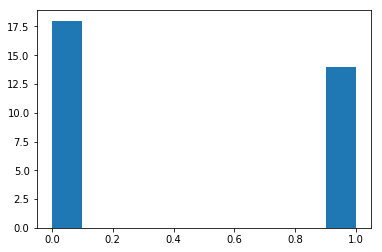

In [17]:
plt.hist(df.vs)

(array([ 7., 10.,  3.,  0., 10.,  0.,  0.,  1.,  0.,  1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

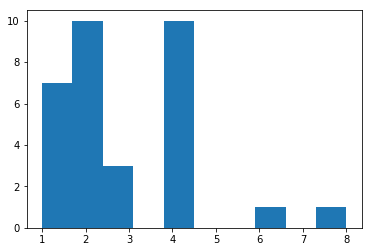

In [18]:
plt.hist(df.carb)

In [19]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


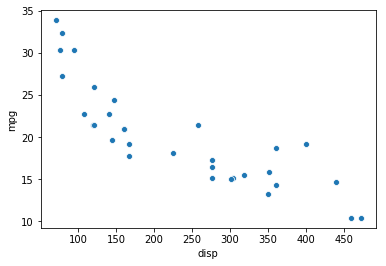

In [20]:
sns.scatterplot(x=df.disp,y=df.mpg,data=df)

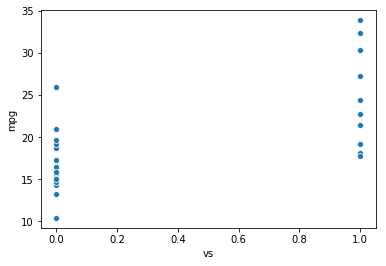

In [21]:
sns.scatterplot(x=df.vs,y=df.mpg,data=df)

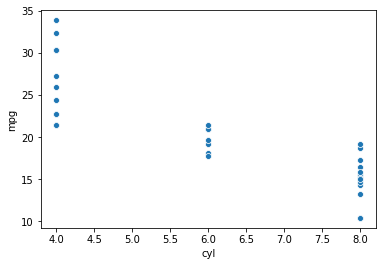

In [22]:
sns.scatterplot(x=df.cyl,y=df.mpg,data=df)

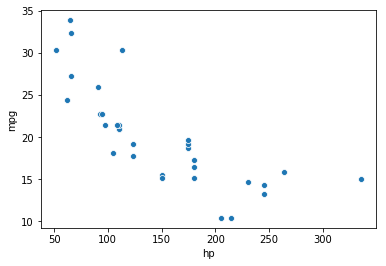

In [23]:

sns.scatterplot(x=df.hp,y=df.mpg,data=df)

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


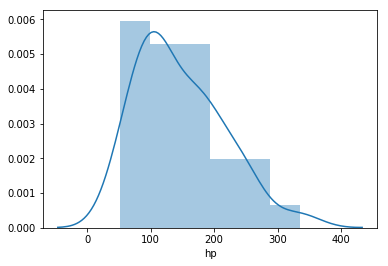

In [60]:
sns.distplot(df.hp)
df[['mpg',"disp",'hp','drat','wt','qsec']].corr()

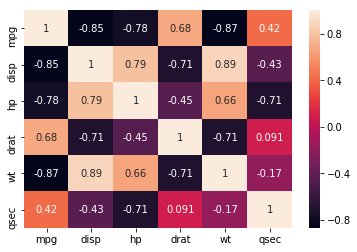

In [61]:
sns.heatmap(df[['mpg',"disp",'hp','drat','wt','qsec']].corr(),annot=True)

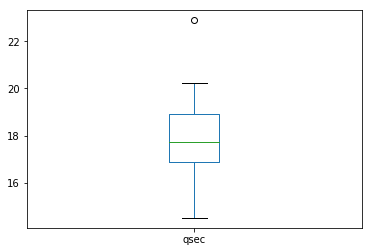

In [62]:
df.qsec.plot(kind='box')

# find quartiles

In [63]:
# method 1 to treat out layier
q1,q2,q3=np.quantile(df.hp,q=[0.25,.5,.75])

In [64]:
iql=q3-q1
iql

83.5

In [65]:
lower=q1+1.5*iql
higher=q3+1.5*iql
lower

221.75

In [66]:
df[df.hp>higher]


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


(array([5., 5., 7., 2., 6., 2., 3., 1., 0., 1.]),
 array([ 52. ,  80.3, 108.6, 136.9, 165.2, 193.5, 221.8, 250.1, 278.4,
        306.7, 335. ]),
 <a list of 10 Patch objects>)

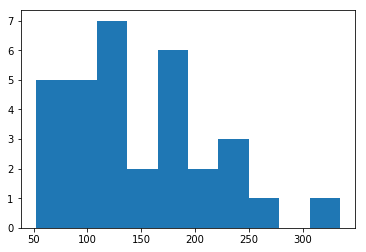

In [67]:
plt.hist(df.hp)

In [68]:
df[df.hp<lower]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4


In [69]:
#method 2 to treat out layier

In [70]:
df[df.hp>df.hp.max()*0.8]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [71]:
uv=df.hp.max()*0.80
uv

268.0

In [72]:
df[df.hp>uv]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [73]:
lv=df.hp.min()*0.2
lv,lower

(10.4, 221.75)

In [74]:
df[df.hp<lv]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


In [75]:
#method 3 to treat out laier
np.percentile(df.hp,[99])

array([312.99])

In [76]:
np.percentile(df.hp,[99])[0]
uv = np.percentile(df.hp,[99])[0]
df[(df.hp>uv)]


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [77]:
np.percentile(df.hp,[1])[0]
lv = np.percentile(df.hp,[1])[0]
df[(df.hp< lv)]
df.hp[(df.hp <0.3*lv)] = 0.3*lv

C:\Users\ravik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([5., 5., 7., 2., 6., 2., 3., 1., 0., 1.]),
 array([ 52. ,  80.3, 108.6, 136.9, 165.2, 193.5, 221.8, 250.1, 278.4,
        306.7, 335. ]),
 <a list of 10 Patch objects>)

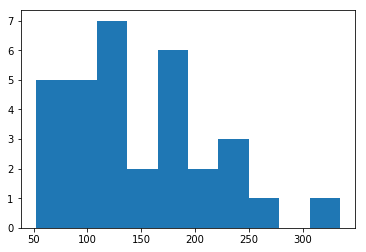

In [78]:
plt.hist(df.hp)

# base model

In [79]:
df.mpg.mean()

20.090624999999996

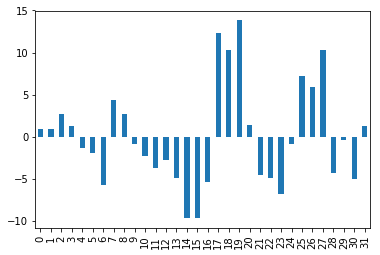

In [110]:
baseresd=df.mpg-df.mpg.mean()
baseresd.plot(kind="bar")

In [121]:
model
del df['model']

LinearRegression()

In [138]:
model=LinearRegression()

In [141]:

x=df.iloc[:,df.columns!='mpg']
y=df['mpg']


In [142]:
model.fit(x,y)

LinearRegression()

In [147]:
model.intercept_,model.coef_

(12.303374155996293,
 array([-0.11144048,  0.01333524, -0.02148212,  0.78711097, -3.71530393,
         0.82104075,  0.31776281,  2.52022689,  0.65541302, -0.19941925]))

0.8690157644777647

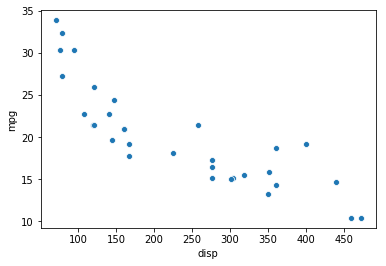

In [144]:
sns.scatterplot(x=df.disp,y=df.mpg,data=df)
r2_score(y,ypred)

In [132]:
ypred=model.predict(x)

In [133]:
lasso=Lasso()
ridge=Ridge()

In [150]:
cross_val_score(ridge,x,y)

array([0.12996473, 0.47380936, 0.72478191, 0.69104693, 0.54898879])

In [151]:
r2_score(y,ypred), mean_squared_error(y,ypred), mean_absolute_error(y,ypred)

(0.8690157644777647, 4.609200938020333, 1.7227401628911443)

In [152]:
r2_score(y,ypred)

0.8690157644777647

In [153]:
cross_val_score(ridge,x,y)

array([0.12996473, 0.47380936, 0.72478191, 0.69104693, 0.54898879])

In [324]:
file=r"C:\Users\ravik\Downloads\weather.csv"

In [325]:
df=pd.read_csv(file)

In [326]:
df.shape

(366, 22)

In [327]:
df.size

8052

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [329]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [330]:
df.Sunshine.describe()

count    363.000000
mean       7.909366
std        3.481517
min        0.000000
25%        5.950000
50%        8.600000
75%       10.500000
max       13.600000
Name: Sunshine, dtype: float64

In [331]:
df.Sunshine.isnull().sum()

3

In [332]:
df.fillna(df.mean(),inplace=True)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [334]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.467180,13.023978,7.875308,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,6.000000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [335]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035531,0.217224,0.126251,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451395,0.109415,-0.214649,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.149326,0.096160,0.218979,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316942,0.287709,0.068176,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035531,0.451395,-0.149326,0.316942,1.000000,0.095676,-0.064200,0.072494,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.378081
WindGustSpeed,0.217224,0.109415,0.096160,0.287709,0.095676,1.000000,0.518508,0.693641,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.251912
WindSpeed9am,0.126251,-0.214649,0.218979,0.068176,-0.064200,0.518508,1.000000,0.467090,-0.267654,0.145866,-0.350416,-0.243102,0.100961,-0.022312,0.063303,-0.232944,0.039048
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072494,0.693641,0.467090,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.497692,-0.349433,-0.267654,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.755186,-0.069432,0.145866,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


In [336]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df.WindGustDir=enc.fit_transform(df.WindGustDir)

df.WindDir9am=enc.fit_transform(df.WindDir9am)

df.WindDir3pm=enc.fit_transform(df.WindDir3pm)

df.RainToday=enc.fit_transform(df.RainToday)

df.RainTomorrow=enc.fit_transform(df.RainTomorrow)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    int32  
 6   WindGustSpeed  366 non-null    float64
 7   WindDir9am     366 non-null    int32  
 8   WindDir3pm     366 non-null    int32  
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [337]:
del df["RISK_MM"]

In [357]:
X=df.iloc[:,df.columns!='RainTomorrow']
y=df.RainTomorrow

In [358]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [373]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035531,-0.207415,0.217224,-0.247843,-0.063849,0.126251,...,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.230733,0.233213
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451395,-0.225633,0.109415,-0.177313,0.013260,-0.214649,...,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,-0.065860,0.049228
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.149326,0.011417,0.096160,-0.011467,0.065003,0.218979,...,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.693024,0.133586
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316942,-0.189593,0.287709,-0.236797,-0.074369,0.068176,...,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,-0.032638,0.090528
Sunshine,0.035531,0.451395,-0.149326,0.316942,1.000000,-0.038679,0.095676,-0.061249,0.135211,-0.064200,...,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.166477,-0.386095
WindGustDir,-0.207415,-0.225633,0.011417,-0.189593,-0.038679,1.000000,0.218289,0.115565,0.354051,0.164012,...,0.055546,0.072419,-0.140887,-0.139452,0.000601,-0.017459,-0.215087,-0.229800,0.046787,0.041922
WindGustSpeed,0.217224,0.109415,0.096160,0.287709,0.095676,0.218289,1.000000,-0.100781,0.167105,0.518508,...,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.189886,0.249445
WindDir9am,-0.247843,-0.177313,-0.011467,-0.236797,-0.061249,0.115565,-0.100781,1.000000,0.054961,-0.113786,...,0.113084,0.016604,0.113071,0.104286,-0.037391,0.063241,-0.226023,-0.156527,-0.034692,-0.064743
WindDir3pm,-0.063849,0.013260,0.065003,-0.074369,0.135211,0.354051,0.167105,0.054961,1.000000,0.071247,...,0.017569,-0.147176,-0.242707,-0.237190,-0.153096,-0.116438,-0.060438,0.017418,0.057614,0.018634
WindSpeed9am,0.126251,-0.214649,0.218979,0.068176,-0.064200,0.164012,0.518508,-0.113786,0.071247,1.000000,...,-0.267654,0.145866,-0.350416,-0.243102,0.100961,-0.022312,0.063303,-0.232944,0.262626,0.088224


In [374]:
model=LinearRegression()
model=DecisionTreeClassifier()

In [375]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [376]:
ypred=model.predict(X_train)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [380]:
print('accuracy_score',accuracy_score(y_train,ypred))

accuracy_score 1.0


In [388]:
model.fit(X_test,y_test)
print(classification_report(ypred,y_train))
print('typeI,typeII error=0')
confusion_matrix(ypred,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00        52

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

typeI,typeII error=0


array([[240,   0],
       [  0,  52]], dtype=int64)

In [365]:
ypred=model.predict(X_test)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [366]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_sam

In [367]:
accuracy_score(y_test,ypred)
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

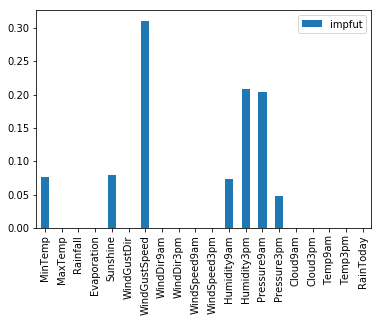

In [368]:
impfut=model.feature_importances_
f=pd.DataFrame(impfut,columns=["impfut"],index=X_train.columns)
f.plot(kind="bar")

In [410]:
df.WindGustDir.fillna(df.WindGustDir.mode(),inplace=True)
f

,impfut
MinTemp,0.076236
MaxTemp,0.000000
Rainfall,0.000000
Evaporation,0.000000
Sunshine,0.078656
WindGustDir,0.000000
WindGustSpeed,0.310559
WindDir9am,0.000000
WindDir3pm,0.000000
WindSpeed9am,0.000000


In [353]:
df.fillna(df.mode(),inplace=True)

In [355]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [356]:
df.WindDir9am.fillna(df.WindDir9am.mode(),inplace=True)

In [256]:
lasso=Lasso()
ridge=Ridge()
cross_val_score(ridge,X,y)

array([0.18404721, 0.55950291, 0.26645325, 0.51889884, 0.65879558])

In [257]:
r2_score(y,ypred), mean_squared_error(y,ypred), mean_absolute_error(y,ypred)

ValueError: Found input variables with inconsistent numbers of samples: [366, 74]